In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(1,20,50)+np.linspace(1,5,50)
x=x.reshape(-1,1)

for i in range(4):
    idx=np.random.randint(0,50)
    x[i]=np.random.randint(50,70)
y=np.linspace(50,100,50)

In [3]:
from scipy.stats import linregress

In [4]:
#just testing ,no use in the code
a=[10,15]
b=[15,20]

#Here m=20-15/15-10=5/5=1 and c=20-m*x2

linregress(x=a,y=b) #works Now make the function ,r-value is the correlation coeff


LinregressResult(slope=1.0, intercept=5.0, rvalue=1.0, pvalue=0.0, stderr=0.0)

In [5]:
#function to return slope and intercept
def twodimensional(a,b):
    res=linregress(x=a,y=b)
    return res.slope,res.intercept

In [6]:
#finding intercept from normal


from scipy.optimize import fsolve

def intercept(slope, intercept, x1, y1):
    
    a = (x1 + slope*y1 - slope*intercept)/(1 + slope**2)
    b = (slope*x1 + (slope**2)*y1 - (slope**2)*intercept)/(1 + slope**2) + intercept
 
    return a, b

In [7]:
##testing
from scipy.spatial import distance
raw_1=[2,2]
raw_2=[2,3]
print(distance.euclidean(raw_1, raw_2)) #working

1.0


In [8]:
import random
original_x=x
original_y=y
defeatable=0.7 #percentage of inliers i have taken is 70%
for z in range(15): #total no of iterations i want
    print("On iteration {}".format(z))
    #shuffling x and y after zipping and taking only 7 points let's say
    

    cache=list(zip(x,y))
    random.shuffle(cache)
    
    x,y= zip(*cache)
    sampled_x=list(x[:7])
    
    xx=[]
    for i in sampled_x:
        xx.append(list(i)[0])
    
    sampled_y=list(y[:7])
    
    test_y=list(y[7:])
    test_x=list(x[7:])
    test_xx=[]
    for i in test_x:
        test_xx.append(list(i)[0])
    
    m,c=twodimensional(xx,sampled_y)
    


    count=0
    x_store=[]
    y_store=[]
    for i in range(len(test_xx)):
        tester_x=test_xx[i]
        tester_y=test_y[i]
        a,b=intercept(m,c,tester_x,tester_y)
        dist=distance.euclidean([a,b],[tester_x,tester_y])
        if dist<4:#I have taken 4 as a random threshold(hyperparameter)
            count+=1
            x_store.append(tester_x)
            y_store.append(tester_y)
    res_1=np.array(x_store)
    res_2=np.array(y_store)

    if count/50>defeatable:
        defeatable=count/50
        actual_m=m
        actual_c=c

    if count/50>0.76: #we got a good model let's break the loop and save time
        print("f*** yeah!!!")
        break



        
    

On iteration 0
f*** yeah!!!


In [9]:
actual_m

2.1739130434782608

In [10]:
actual_c

45.65217391304346

In [11]:
#Moment of truth

from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(original_x.reshape(-1,1),original_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
import matplotlib.pyplot as plt


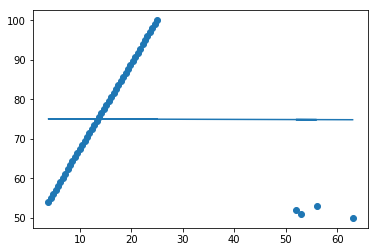

In [13]:
plt.scatter(original_x.reshape(-1,1),original_y)
plt.plot(original_x.reshape(-1,1),clf.predict(original_x))
plt.show()

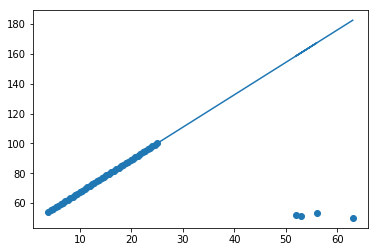

In [14]:
#my model
plt.scatter(original_x.reshape(-1,1),original_y)
plt.plot(original_x.reshape(-1,1),actual_m*(original_x)+actual_c)
plt.show()
